Sentiment analysis is a Natural Language Processing (NLP) task that identifies and classifies opinions or emotions in text.
It determines whether the sentiment expressed is positive, negative, or neutral.
It’s widely used in:

Social media monitoring

Product reviews

Customer feedback

Market research

Earlier, sentiment analysis used traditional methods like:

Bag of Words (BoW)

TF-IDF

Naïve Bayes or SVM

These methods work but ignore context and word order.
Deep learning models, on the other hand, learn meaning and relationships between words automatically through embeddings and sequential modeling.

IMPORTING THE REQUIRED LIBRARIES FOR SENTIMENT ANALYSIS

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("words")
nltk.download("vader_lexicon")
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

This code is for ignor the warnings

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [39]:
df=pd.read_csv(path + "/Reviews.csv")

In [40]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [41]:
df["Text"][12]

"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat."

Data cleaning where text column contain some html tags in it

In [42]:
import re
from bs4 import BeautifulSoup

# Function to clean HTML tags and extra spaces
def clean_html(text):
    if pd.isnull(text):
        return ""
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove extra whitespace and special HTML entities
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'&[a-z]+;', '', text)
    return text.strip()

In [43]:
df['Text'] = df['Text'].apply(clean_html)

<Axes: title={'center': 'count_of_score'}, xlabel='Score'>

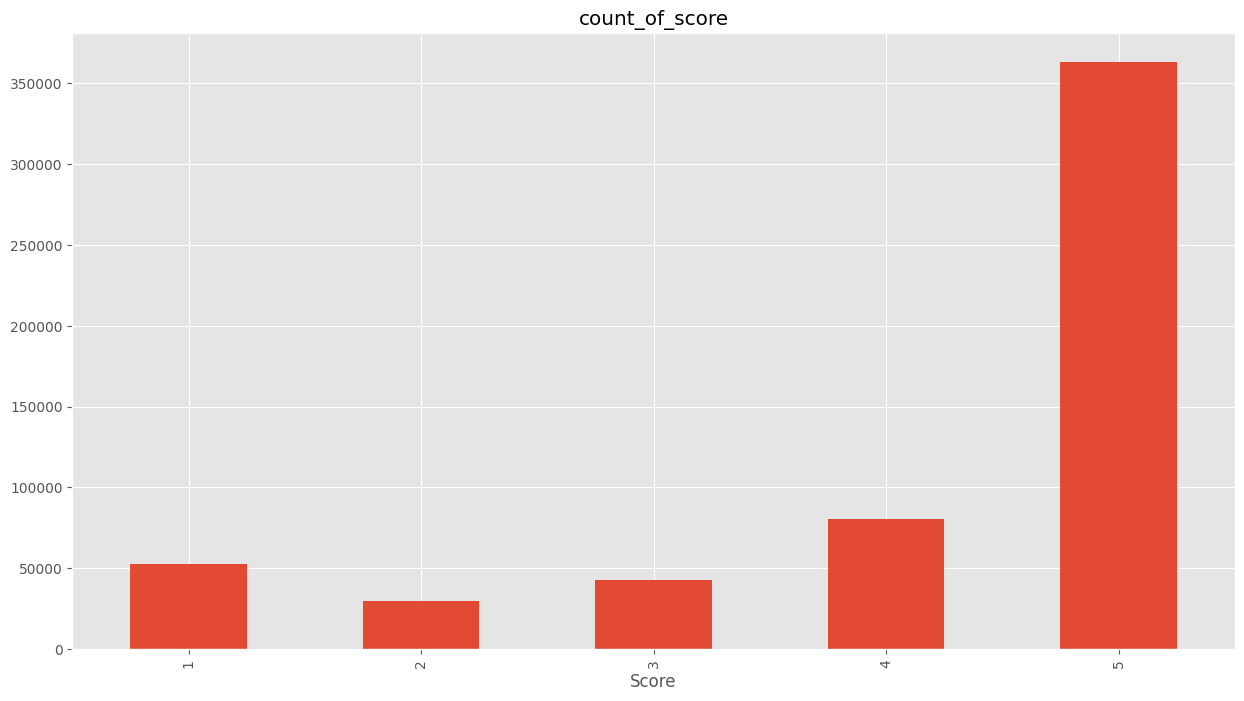

In [44]:
df["Score"].value_counts().sort_index().plot(kind="bar",title="count_of_score",figsize=(15,8))

In [45]:
example=df["Text"][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [46]:
token=nltk.word_tokenize(example)
token

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

| **Tag** | **Meaning**                              | **Example**          |
| ------- | ---------------------------------------- | -------------------- |
| CC      | Coordinating conjunction                 | and, but, or         |
| CD      | Cardinal number                          | one, two, 3, 40      |
| DT      | Determiner                               | the, a, an, some     |
| EX      | Existential there                        | there (is)           |
| FW      | Foreign word                             | bonjour, hola        |
| IN      | Preposition or subordinating conjunction | in, on, of, before   |
| JJ      | Adjective                                | big, beautiful       |
| JJR     | Adjective, comparative                   | bigger, better       |
| JJS     | Adjective, superlative                   | biggest, best        |
| LS      | List item marker                         | 1., a), i.           |
| MD      | Modal                                    | can, will, should    |
| NN      | Noun, singular or mass                   | car, music, laptop   |
| NNS     | Noun, plural                             | cars, songs, laptops |
| NNP     | Proper noun, singular                    | John, London, Apple  |
| NNPS    | Proper noun, plural                      | Americans, Indians   |
| PDT     | Predeterminer                            | all, both, half      |
| POS     | Possessive ending                        | ’s, ’                |
| PRP     | Personal pronoun                         | I, you, he, she, it  |
| PRP$    | Possessive pronoun                       | my, your, his, their |
| RB      | Adverb                                   | quickly, very, now   |
| RBR     | Adverb, comparative                      | faster, better       |
| RBS     | Adverb, superlative                      | fastest, best        |
| RP      | Particle                                 | up, off, out         |
| SYM     | Symbol                                   | $, %, +, =           |
| TO      | to (infinitive marker)                   | to go, to eat        |
| UH      | Interjection                             | oh, wow, oops        |
| VB      | Verb, base form                          | run, eat, go         |
| VBD     | Verb, past tense                         | ran, ate, went       |
| VBG     | Verb, gerund/present participle          | running, eating      |
| VBN     | Verb, past participle                    | eaten, gone          |
| VBP     | Verb, non-3rd person singular present    | run, eat (I run)     |
| VBZ     | Verb, 3rd person singular present        | runs, eats           |
| WDT     | Wh-determiner                            | which, that          |
| WP      | Wh-pronoun                               | who, what            |
| WP$     | Possessive wh-pronoun                    | whose                |
| WRB     | Wh-adverb                                | when, where, why     |
| .       | Punctuation                              | . , ? ! : ;          |


In [47]:
#POS==> Parts of speech

tagged=nltk.pos_tag(token)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [48]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

This is part of Named Entity Recognition (NER) using NLTK. It takes already POS-tagged text and identifies named entities like people, organizations, and locations.

In [49]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [50]:
#VADER(BOW)===>(VADER = Valence Aware Dictionary and sEntiment Reasoner)

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

Sentiment analyser model calling

In [51]:
sia=SentimentIntensityAnalyzer()

The following code gives the score for positive,negativ,nuetral and compound of all 3 score

In [52]:
sia.polarity_scores("Elon Musk is the CEO of Tesla and SpaceX")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [53]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [54]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [55]:
#cheking the  polyrity_score
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row["Text"]
  myid=row["Id"]
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [56]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.018, 'neu': 0.84, 'pos': 0.142, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 1

load the res to data frame and save it in  the variable vaders

In [57]:
vaders=pd.DataFrame(res).T

In [58]:
vaders=vaders.reset_index().rename(columns={"index":"Id"})

In [59]:
merged_df = vaders.merge(df, how="left", on="Id")

In [60]:
merged_df

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


<Axes: xlabel='Score', ylabel='compound'>

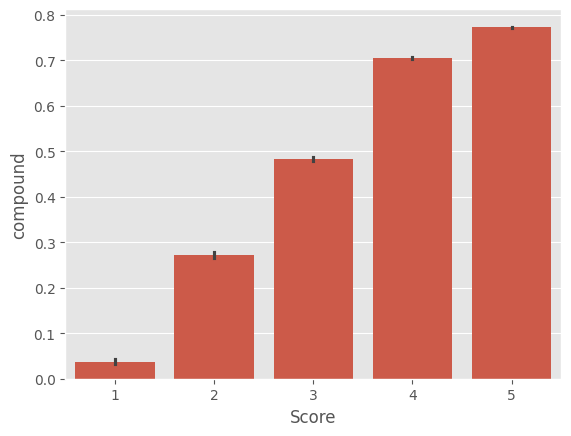

In [61]:
sns.barplot(x=merged_df["Score"],y=merged_df["compound"])

Bar plot for all the score in the merged data frame

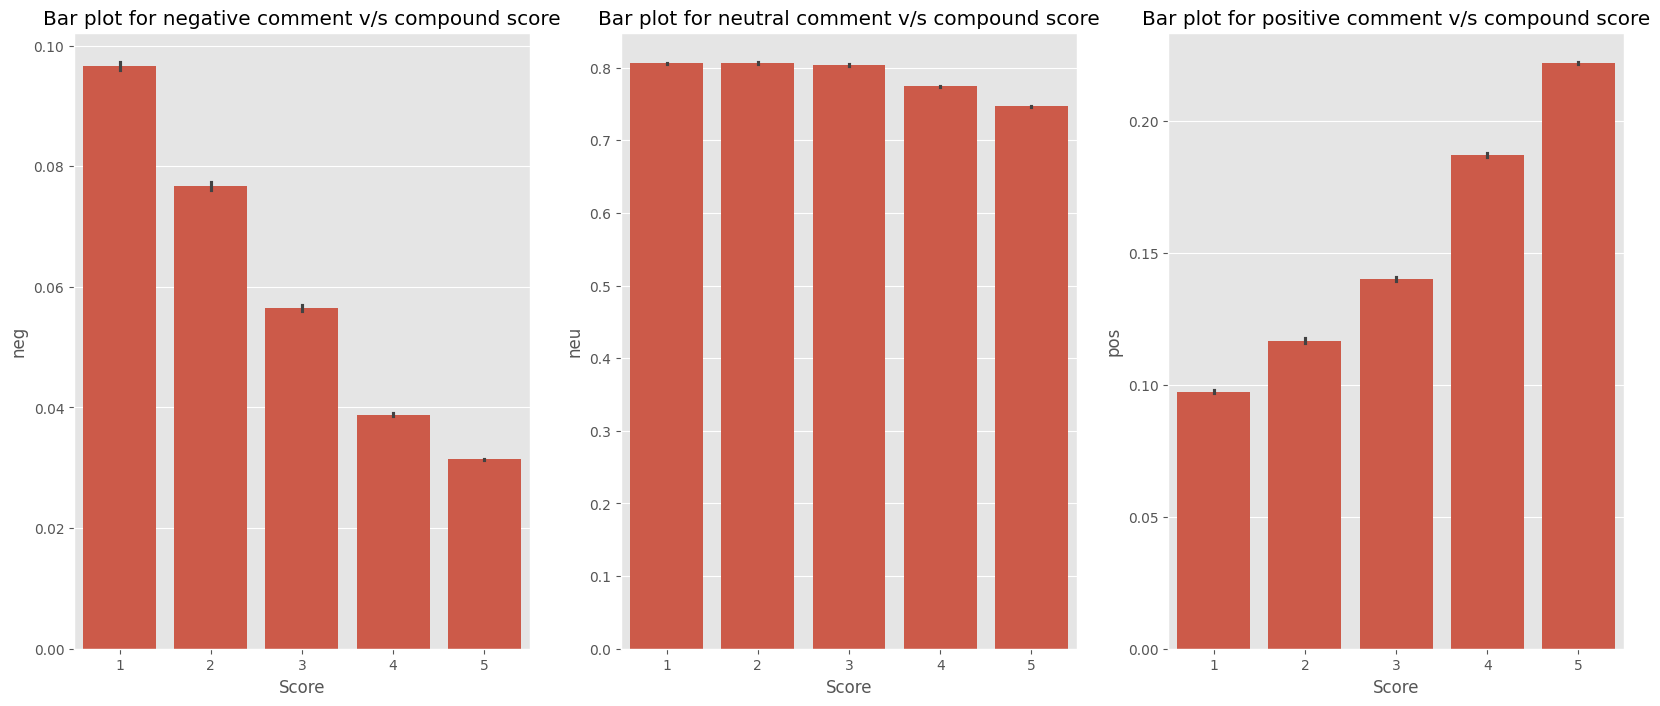

In [62]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x=merged_df["Score"],y=merged_df["neg"])
plt.title("Bar plot for negative comment v/s compound score")
plt.subplot(1,3,2)
sns.barplot(x=merged_df["Score"],y=merged_df["neu"])
plt.title("Bar plot for neutral comment v/s compound score")
plt.subplot(1,3,3)
sns.barplot(x=merged_df["Score"],y=merged_df["pos"])
plt.title("Bar plot for positive comment v/s compound score")
plt.show()